In [1]:
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...
remote: Enumerating objects: 20304, done.
remote: Counting objects: 100% (1502/1502), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 20304 (delta 1438), reused 1348 (delta 1348), pack-reused 18802
Receiving objects: 100% (20304/20304), 11.17 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (14314/14314), done.


In [2]:
!pip install huggingface_hub

In [3]:
!pip install Ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 15.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [5]:
from roboflow import Roboflow
rf=Roboflow(api_key="iDlGoYqhZ2J7wJqM56lP")
project=rf.workspace("ysa-9gjhm").project("tumor-sxfyw")
version=project.version(5)
dataset=version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.50, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to tumor-5 in yolov8:: 100%|██████████| 920/920 [00:00<00:00, 6990.44it/s]


In [6]:
import os
import urllib.request

## Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")

os.makedirs (weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt"]


#Download each file
for url in urls:
   file_name = os.path.join(weights_dir, os.path.basename (url))
   urllib.request.urlretrieve(url, file_name)
   print(f"Downloaded {file_name}")

Downloaded /content/weights/yolov10n.pt


In [8]:
!yolo task=detect mode=train epochs=25 batch=32 plots=True \
model=weights/yolov10n.pt \
data=/content/tumor-5/data.yaml

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10n.pt, data=/content/tumor-5/data.yaml, epochs=25, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [11]:
!yolo task=detect mode=predict conf=0.25 save=True model="../weights/yolov10m.pt" source="/content/img.jpg"

100% 32.1M/32.1M [00:00<00:00, 452MB/s]
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16543024 parameters, 0 gradients, 63.9 GFLOPs

image 1/1 /content/img.jpg: 640x544 1 clock, 1 vase, 122.9ms
Speed: 4.4ms preprocess, 122.9ms inference, 47.8ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [16]:
from ultralytics import YOLO

model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)
results = model(source="/content/tumor-5/valid/images", conf=0.25, save=True)



image 1/36 /content/tumor-5/valid/images/gg-225-_jpg.rf.042e04a788ccefa8465bca85c46731d5.jpg: 640x640 1 tumor, 18.1ms
image 2/36 /content/tumor-5/valid/images/gg-232-_jpg.rf.212431d1c8a8c9566ca448cead8dc30e.jpg: 640x640 1 tumor, 11.3ms
image 3/36 /content/tumor-5/valid/images/gg-237-_jpg.rf.da37e2f206abd8e91010f25e96373f1b.jpg: 640x640 1 tumor, 11.1ms
image 4/36 /content/tumor-5/valid/images/image-1-_jpg.rf.6caafc184df179eef99b3a3d17979e9c.jpg: 640x640 1 tumor, 10.5ms
image 5/36 /content/tumor-5/valid/images/image-11-_jpg.rf.f94ea88110e651459470d61345362533.jpg: 640x640 1 tumor, 11.5ms
image 6/36 /content/tumor-5/valid/images/image-13-_jpg.rf.3894ef2393335056463e5c6e02fa8116.jpg: 640x640 2 tumors, 10.6ms
image 7/36 /content/tumor-5/valid/images/image-14-_jpg.rf.bdd5aa6f1fab08696788ad4dcfa5e6e8.jpg: 640x640 2 tumors, 10.3ms
image 8/36 /content/tumor-5/valid/images/image-2-_jpg.rf.74db10b85411c73d5006db60078a105a.jpg: 640x640 1 tumor, 13.8ms
image 9/36 /content/tumor-5/valid/images/imag

In [17]:
from ultralytics import YOLO

model_path = "/content/runs/detect/train2/weights/best.pt"
model = YOLO(model_path)
results = model(source="/img.jpg", conf=0.25, save=True)





image 1/1 /img.jpg: 640x544 (no detections), 183.7ms
Speed: 8.1ms preprocess, 183.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict3


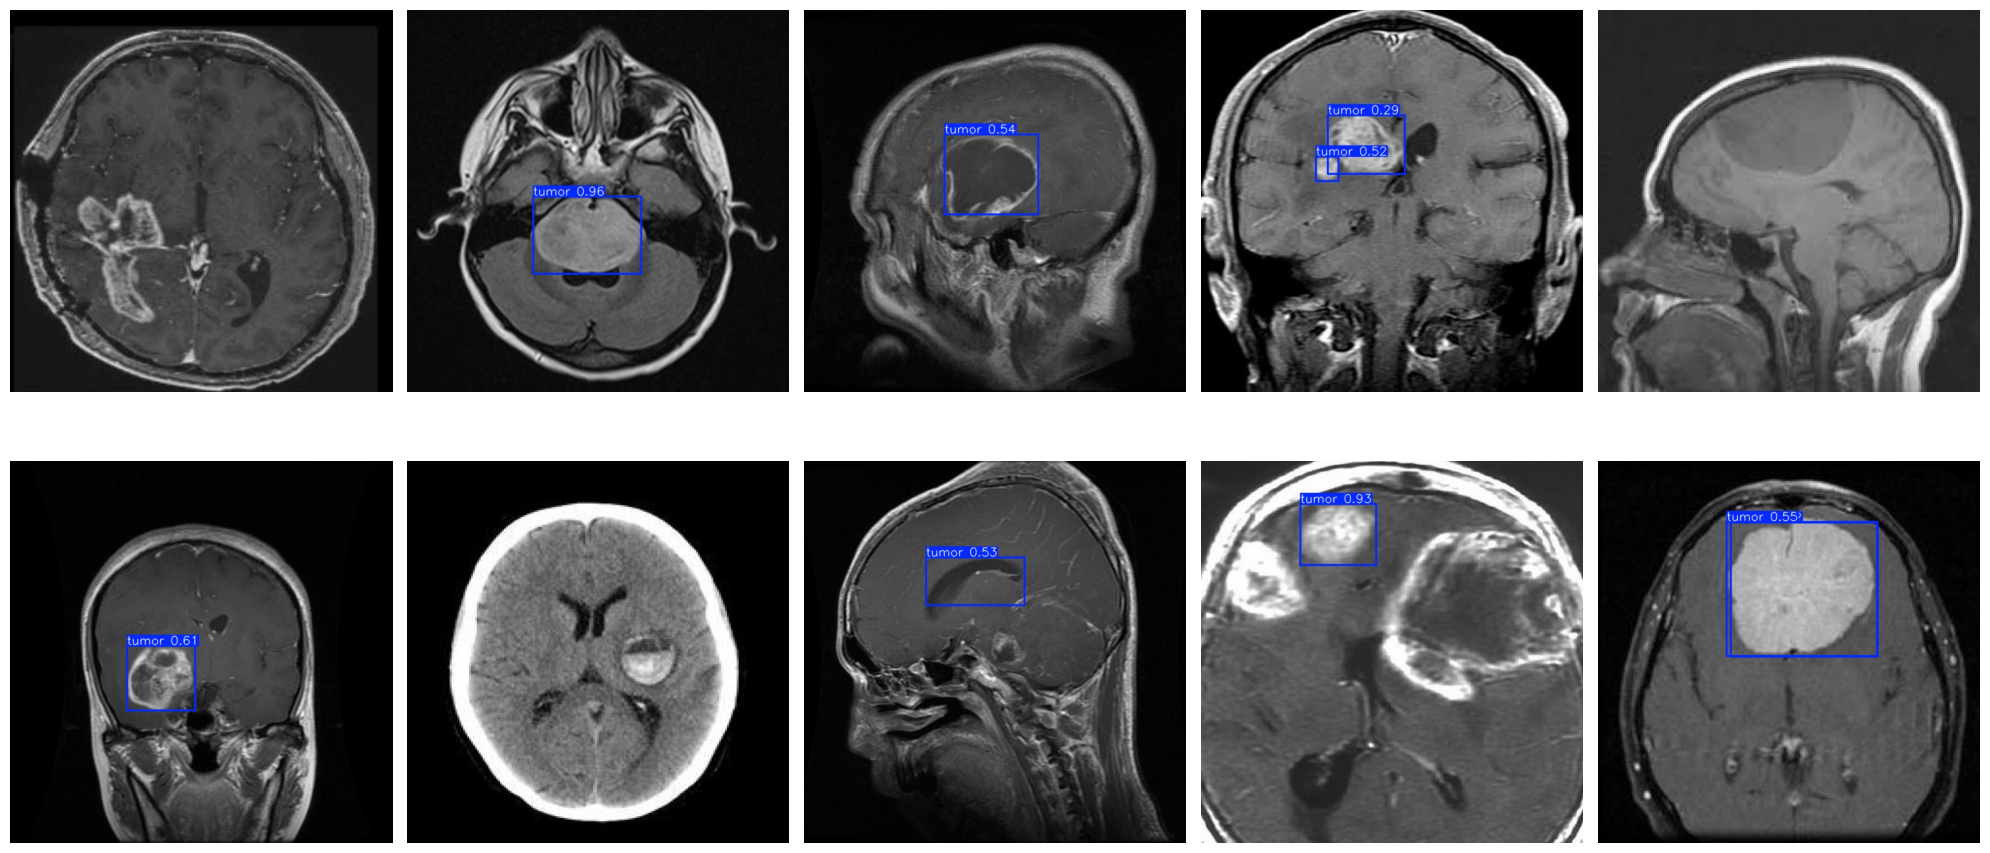

In [53]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/detect/predict2/*.jpg")

images_to_display = images[:10]

fig, axes = plt.subplots(2,5, figsize=(20,10))

for i, ax in enumerate(axes.flat):
  if i < len(images_to_display):
    img = mpimg.imread(images_to_display[i])
    ax.imshow(img)
    ax.axis('off')
  else:
    ax.axis('off')
plt.tight_layout()
plt.show()


image 1/1 /content/tumor-5/valid/images/gg-225-_jpg.rf.042e04a788ccefa8465bca85c46731d5.jpg: 640x640 1 tumor, 65.1ms
Speed: 9.2ms preprocess, 65.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
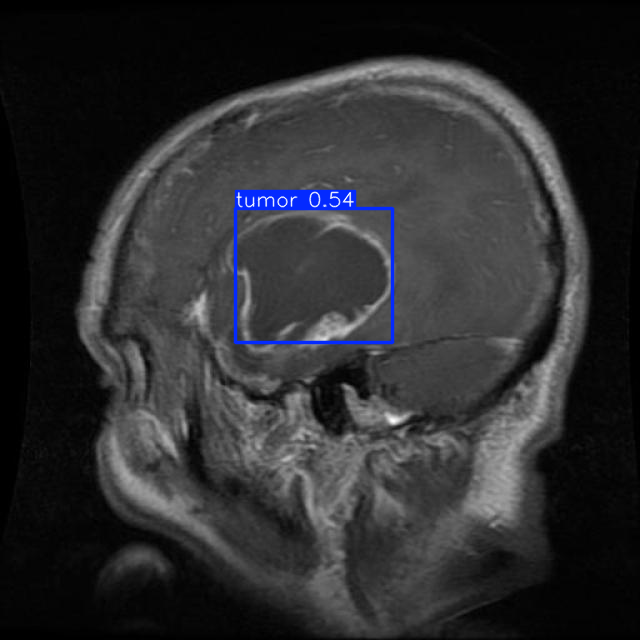

In [56]:
result = model.predict(source = "/content/tumor-5/valid/images/gg-225-_jpg.rf.042e04a788ccefa8465bca85c46731d5.jpg", imgsz = 640, conf = 0.25)
annotated_img = result[0].plot()
annotated_img[:, :, ::-1]

In [57]:
!pip install gradio

In [58]:
import gradio as gr
import cv2
import numpy as np

def predict(image):
  result = model.predict(source=image, imgsz = 640, conf = 0.25)
  annotated_img = result[0].plot()
  annotated_img = annotated_img[:, :, ::-1]
  return annotated_img

app = gr.Interface(
    fn =predict,
    inputs = gr.Image(type="numpy", label="Upload an image"),
    outputs = gr.Image(type="numpy", label="Detect Brain Tumor"),
    title = "Brain Tumor Detection Using Yolov10",
    description="Upload an image and the yolov10 model will detect and annotated brain tumor"
)

app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0b24be7dba8b15c4d1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [27]:
result = model.predict(source = "")
annotated_img = result[0].plot()
annotated_img=annotated_img[:,:, ::-1]
 return annotated_img

app=gr.Interface(
 fn =predict,
 inputs=gr. Image(type="numpy", label="Upload an image")
 outputs=gr. Image (type="numpy", label="Detect Brain Tumor")
 title="Brain Tumor Detection Using Yolov10"
 description="upload an image and the yolov10 model will detect and annotated brain tumor")
app.launch()

IndentationError: unexpected indent (<ipython-input-27-ad8aa463f53b>, line 4)

In [29]:


# Define your prediction function
def predict(image):
    # Perform prediction with your YOLOv10 model
    result = model.predict(source=image)
    annotated_img = result[0].plot()
    annotated_img = annotated_img[:, :, ::-1]  # تغيير ترتيب الألوان إلى RGB

    # Return the annotated image
    return annotated_img

# Set up the Gradio interface
app = gr.Interface(
    fn=predict,
    inputs=gr.inputs.Image(type="numpy", label="Upload an image"),
    outputs=gr.outputs.Image(type="numpy", label="Detect Brain Tumor"),
    title="Brain Tumor Detection Using YOLOv10",
    description="Upload an image and the YOLOv10 model will detect and annotate brain tumor."
)

# Launch the Gradio interface
app.launch()


NameError: name 'gr' is not defined